In [ ]:
# 分类任务实现
# 本 notebook 展示如何使用前馈神经网络进行二分类任务
# 
# 任务描述：
# - 生成二维平面上的随机点
# - 根据点是否在单位圆内进行分类（圆内为类别0，圆外为类别1）
# - 使用神经网络学习这个分类边界
#
# 这是项目学习路径的第6步，在前面章节中我们已经：
# 1. 掌握了 numpy 基础操作
# 2. 理解了神经元和层的概念
# 3. 实现了多层前馈网络
# 4. 抽象出了 Layer 和 Network 类
# 5. 引入了 Softmax 激活函数
#
# 在本章节中，我们将：
# - 生成分类数据集
# - 可视化数据分布
# - 使用神经网络进行分类预测
# - 观察随机权重的局限性，为下一章引入损失函数做铺垫


In [ ]:
# 生成用于分类的数据，并为每个数据点打标签
import numpy as np
import matplotlib.pyplot as plt
import math
import random

Number_of_Data=100

def tag_entry(x,y):
    if x**2+y**2<1:
        tag=0
    else:
        tag=1
    return tag

def create_data(Number_of_Data):
    entry_list=[]
    for i in range (Number_of_Data):
        x=random.uniform(-2,2)
        y=random.uniform(-2,2)
        tag=tag_entry(x,y)
        entry_list.append([x,y,tag])
    return np.array(entry_list)

if __name__=="__main__":
    print(create_data(Number_of_Data))



In [ ]:
#可视化
def plot_data(data,title):
    colors=[]
    for i in data[:,2]:
        if i==0:
            colors.append("orange")
        else:
            colors.append("blue")
    plt.scatter(data[:,0],data[:,1],c=colors)
    plt.title(title)
    plt.show()

if __name__=="__main__":
    data=create_data(Number_of_Data)
    plot_data(data,"Demo")


In [ ]:
def activation_ReLU(inputs):
    return np.maximum(0,inputs)

def activation_softmax(inputs):
    max_value=np.max(inputs,axis=1,keepdims=True)
    slided_inputs=inputs-max_value
    exp_values=np.exp(slided_inputs)
    norm_base=np.sum(exp_values,axis=1,keepdims=True)
    norm_values=exp_values/norm_base
    return norm_values

In [ ]:
class Layer:

    def __init__(self,n_inputs,n_neurons):
        self.weights=np.random.randn(n_inputs,n_neurons)  
        self.biases=np.random.randn(n_neurons)  

    def forward(self,inputs):
        self.sum=np.dot(inputs,self.weights)+self.biases  
        return self.sum  


In [ ]:

class Network:
    def __init__(self,network_shape):
        self.shape=network_shape
        self.layers=[]
        for i in range(len(network_shape)-1):
            layer=Layer(network_shape[i],network_shape[i+1])
            self.layers.append(layer)
    #前馈运算
    def network_forward(self,inputs):
        outputs=[inputs]
        for i in range(len(self.layers)):
            layer_output=self.layers[i].forward(outputs[i])
            if i==len(self.layers)-1:
                layer_output=activation_softmax(layer_output)
            else:
                layer_output=activation_ReLU(layer_output)
            outputs.append(layer_output)
        return outputs

In [ ]:
#分类函数
def classify(probabilities):
    classification=np.rint(probabilities[:,1])
    return classification

In [ ]:
inputs = data[:, (0, 1)]
network_shape = [2, 3, 4, 5, 2]

net = Network(network_shape)
network_forward = net.network_forward(inputs)

# 输出最后一层经过softmax后的结果
softmax_output = network_forward[-1]

data[:,2]=classify(softmax_output)

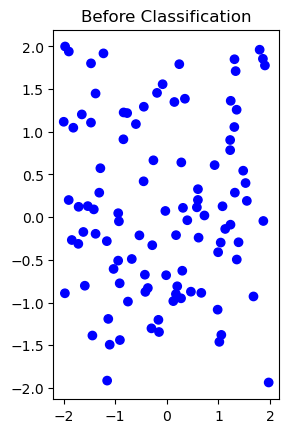

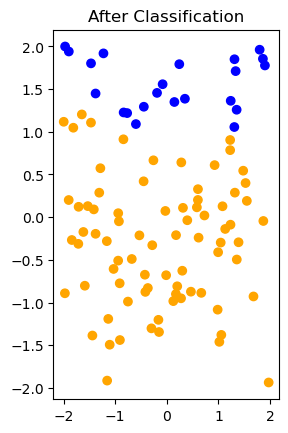

<Figure size 640x480 with 0 Axes>

In [138]:
# 注意：此网络未经训练，使用随机初始化的权重，分类结果无实际意义
#单纯跑通神经网络，只有前向传播，还没有进行反向传播
plt.figurefigsize=(12, 5)
# 在第一个子图中绘制分类前的数据
plt.subplot(1, 2, 1)
plot_data(data, "Before Classification")

# 进行神经网络前向传播和分类
inputs = data[:, (0, 1)]
network_shape = [2, 3, 4, 5, 2]

net = Network(network_shape)
network_forward = net.network_forward(inputs)

softmax_output = network_forward[-1]

data[:,2]=classify(softmax_output)

# 在第二个子图中绘制分类后的数据
plt.subplot(1, 2, 2)
plot_data(data, "After Classification")

plt.tight_layout()
plt.show()
